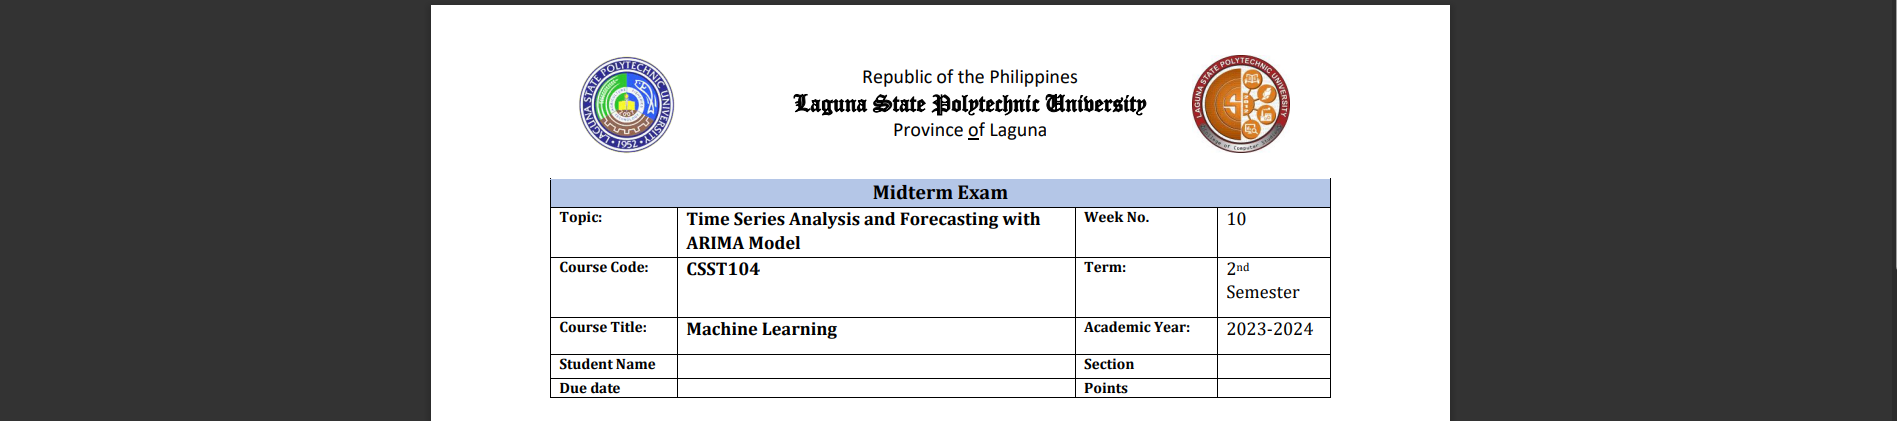

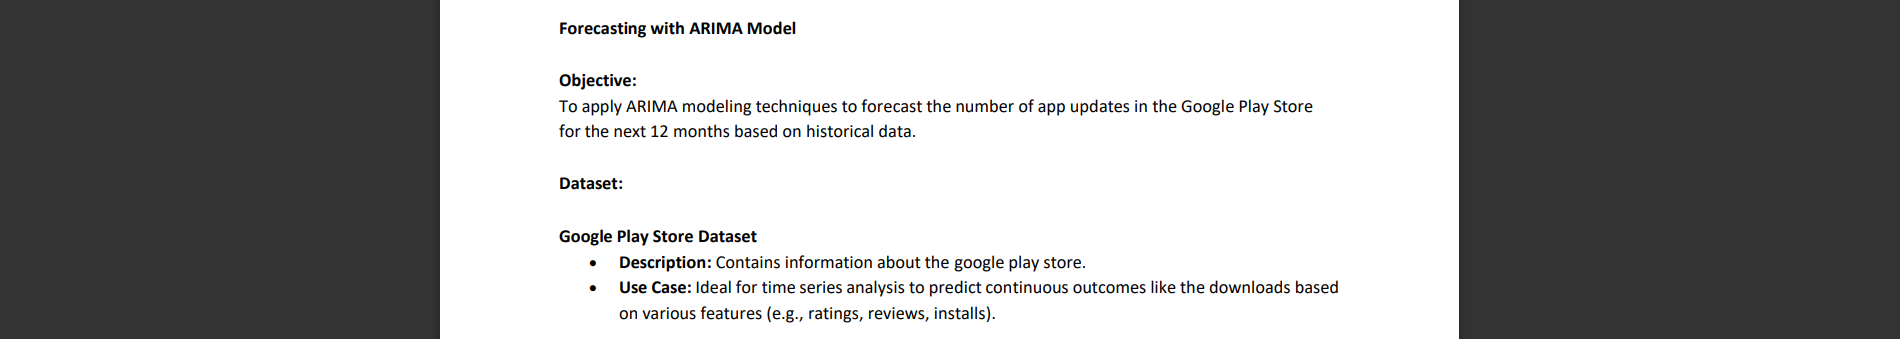

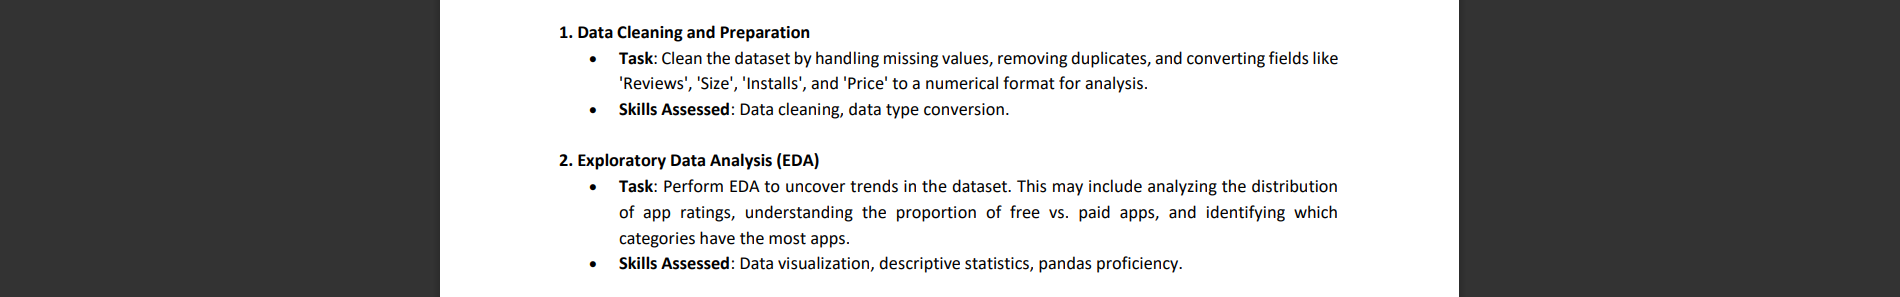

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [63]:
# Dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

data.dropna(subset=['Reviews', 'Size', 'Installs', 'Type', 'Content Rating', 'Price'], inplace=True)

data['Reviews'] = data['Reviews'].astype(int)

data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('M', '')) * 10**6 if 'M' in str(x) else (float(str(x).replace('k', '')) * 10**3 if 'k' in str(x) else 0))


data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
data['Type'] = data['Type'].map({'Free': 0, 'Paid': 1})

content_rating_mapping = {'Everyone': 1, 'Teen': 2, 'Everyone 10+': 3, 'Mature 17+': 4, 'Adults only 18+': 5, 'Unrated': 0}
data['Content Rating'] = data['Content Rating'].map(content_rating_mapping)

data['Price'] = data['Price'].apply(lambda x: float(str(x).replace('$', '')) if '$' in str(x) else 0)

# Display information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  int64  
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  int64  
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.2+ MB
None


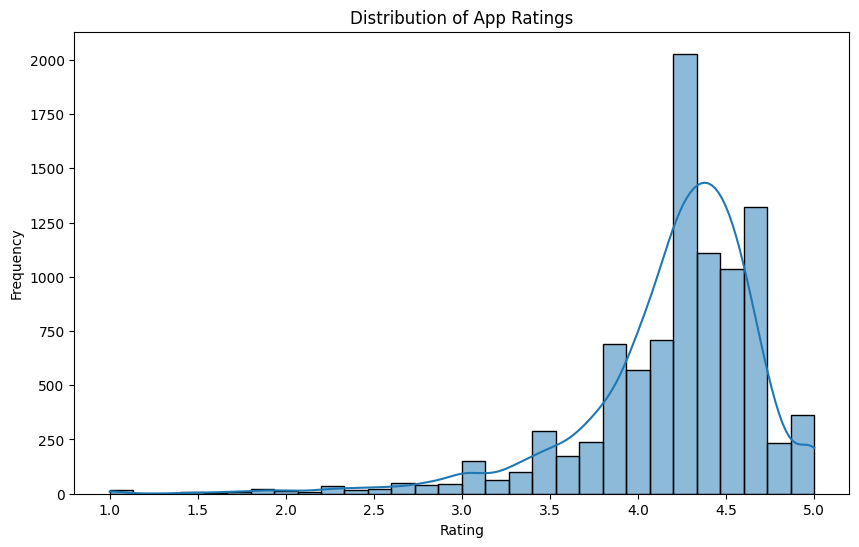

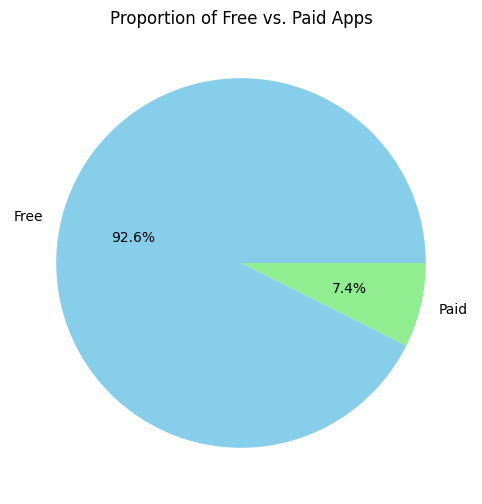

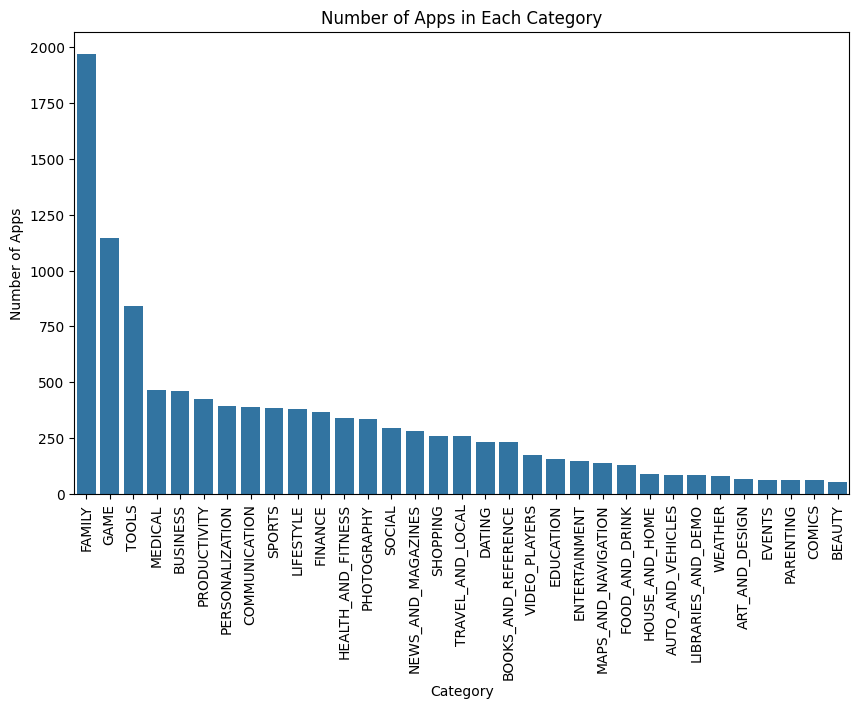

In [64]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
type_counts = data['Type'].map({0: 'Free', 1: 'Paid'}).value_counts()
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data, order=data['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

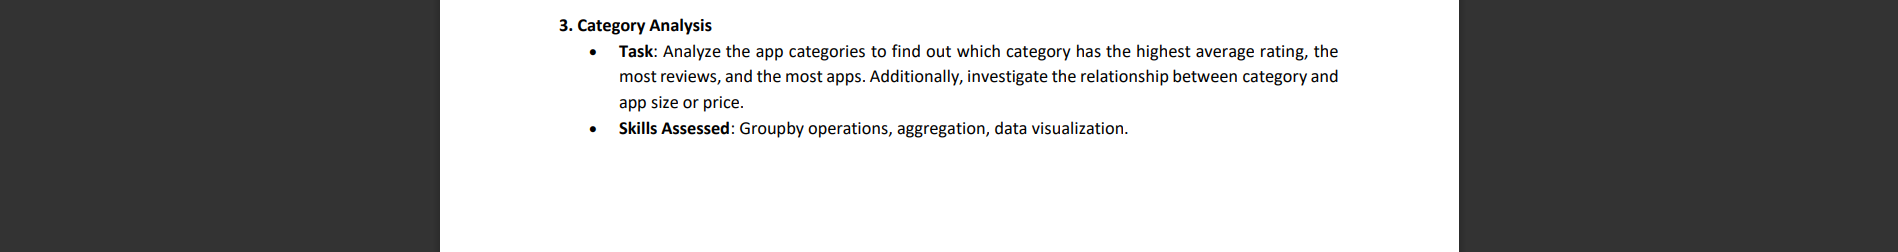

In [65]:
# Highest Average Rating
avg_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
highest_avg_rating_category = avg_rating_by_category.idxmax()
highest_avg_rating = avg_rating_by_category.max()
print(f"Category with the highest average rating: {highest_avg_rating_category} (Average Rating: {highest_avg_rating:.2f})")

# Most Reviews
most_reviews_by_category = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
category_with_most_reviews = most_reviews_by_category.idxmax()
most_reviews = most_reviews_by_category.max()
print(f"Category with the most reviews: {category_with_most_reviews} (Total Reviews: {most_reviews:,})")

# Most Apps
most_apps_by_category = data['Category'].value_counts().sort_values(ascending=False)
category_with_most_apps = most_apps_by_category.idxmax()
most_apps = most_apps_by_category.max()
print(f"Category with the most apps: {category_with_most_apps} (Total Apps: {most_apps})")


Category with the highest average rating: EVENTS (Average Rating: 4.44)
Category with the most reviews: GAME (Total Reviews: 1,585,422,349)
Category with the most apps: FAMILY (Total Apps: 1971)


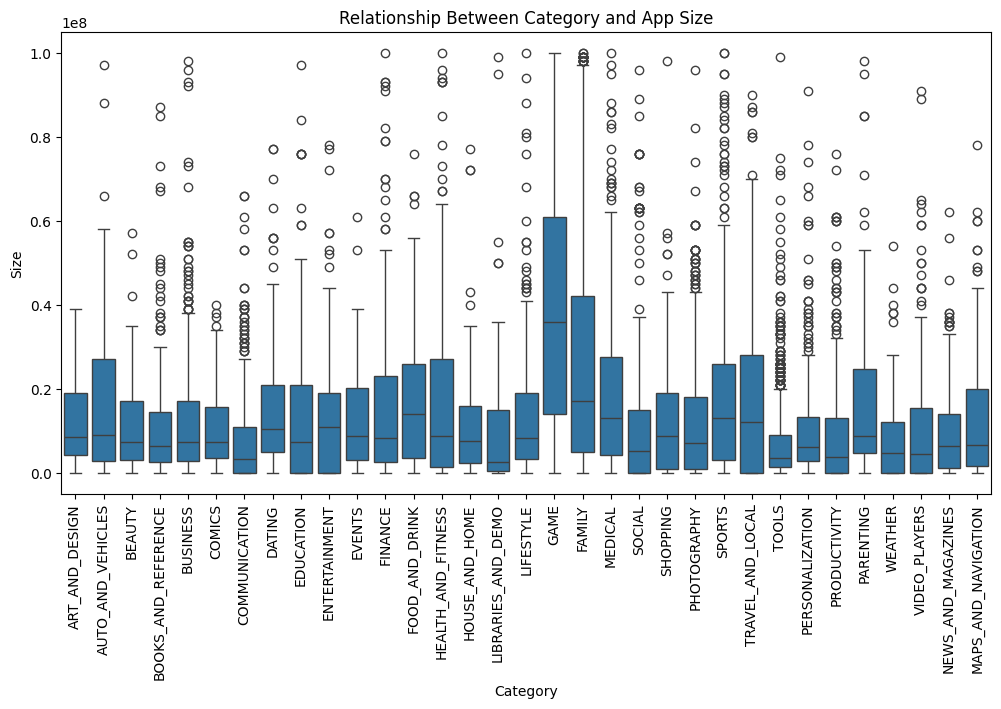

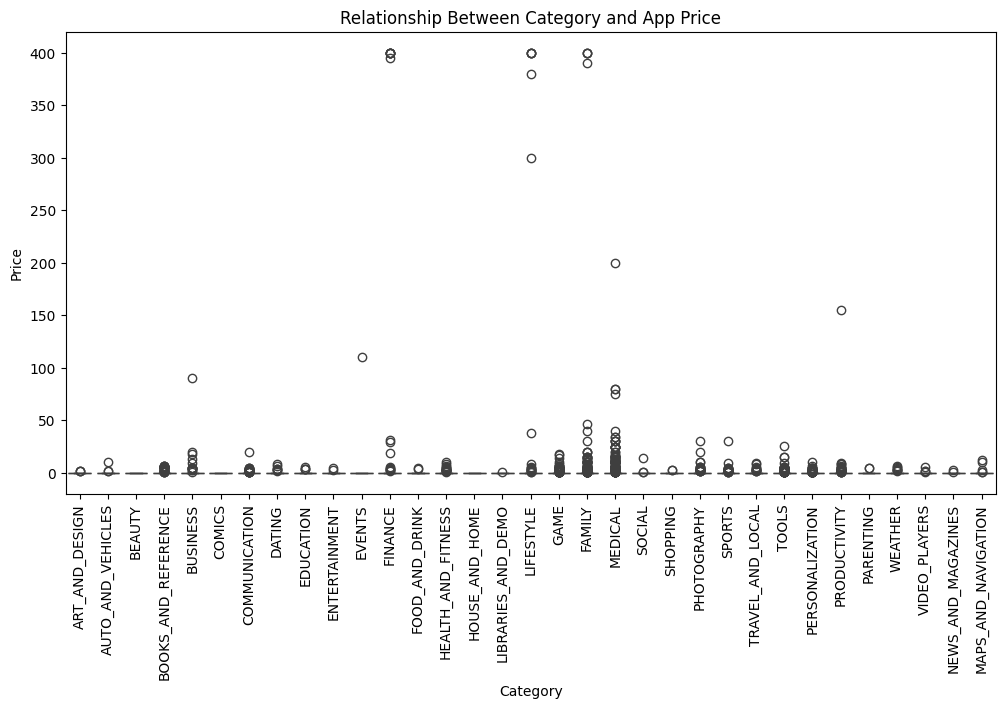

In [66]:
# Relationship Between Category and App Size or Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size', data=data)
plt.xticks(rotation=90)
plt.title('Relationship Between Category and App Size')
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('Relationship Between Category and App Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

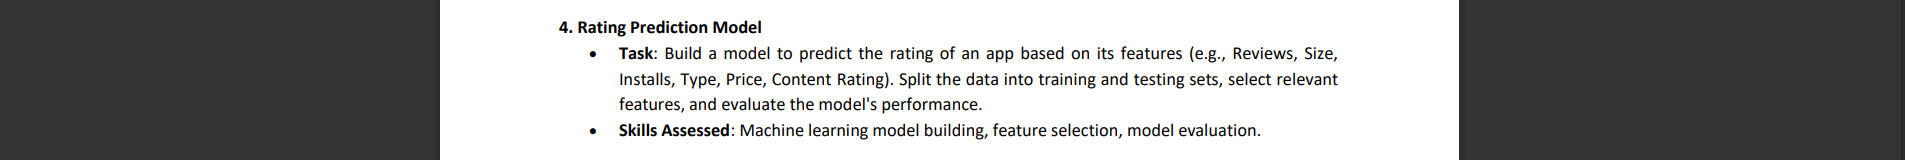

In [67]:

#Variables
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
X = data[features].fillna(0)
y = data['Rating'].fillna(data['Rating'].mean())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.24241902841079915


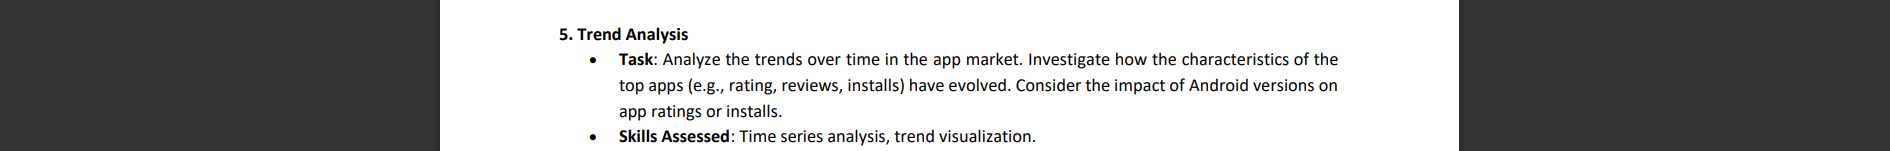

            Android Ver Last Updated    Rating     Reviews     Installs
0            1.0 and up   2018-08-31  4.500000         313        50000
1            1.5 and up   2010-05-31  4.200000        1415       100000
2            1.5 and up   2013-02-28  4.100000       20145      1000000
3            1.5 and up   2014-09-30  4.500000         259        10000
4            1.5 and up   2015-03-31  4.500000         313        10000
..                  ...          ...       ...         ...          ...
638  Varies with device   2018-04-30  4.430000    14948535    730100000
639  Varies with device   2018-05-31  4.398462    18900907   1083581500
640  Varies with device   2018-06-30  4.372941    57710053   1445570000
641  Varies with device   2018-07-31  4.382482   774958862  28069121100
642  Varies with device   2018-08-31  4.415044  1095021451  47811750100

[643 rows x 5 columns]


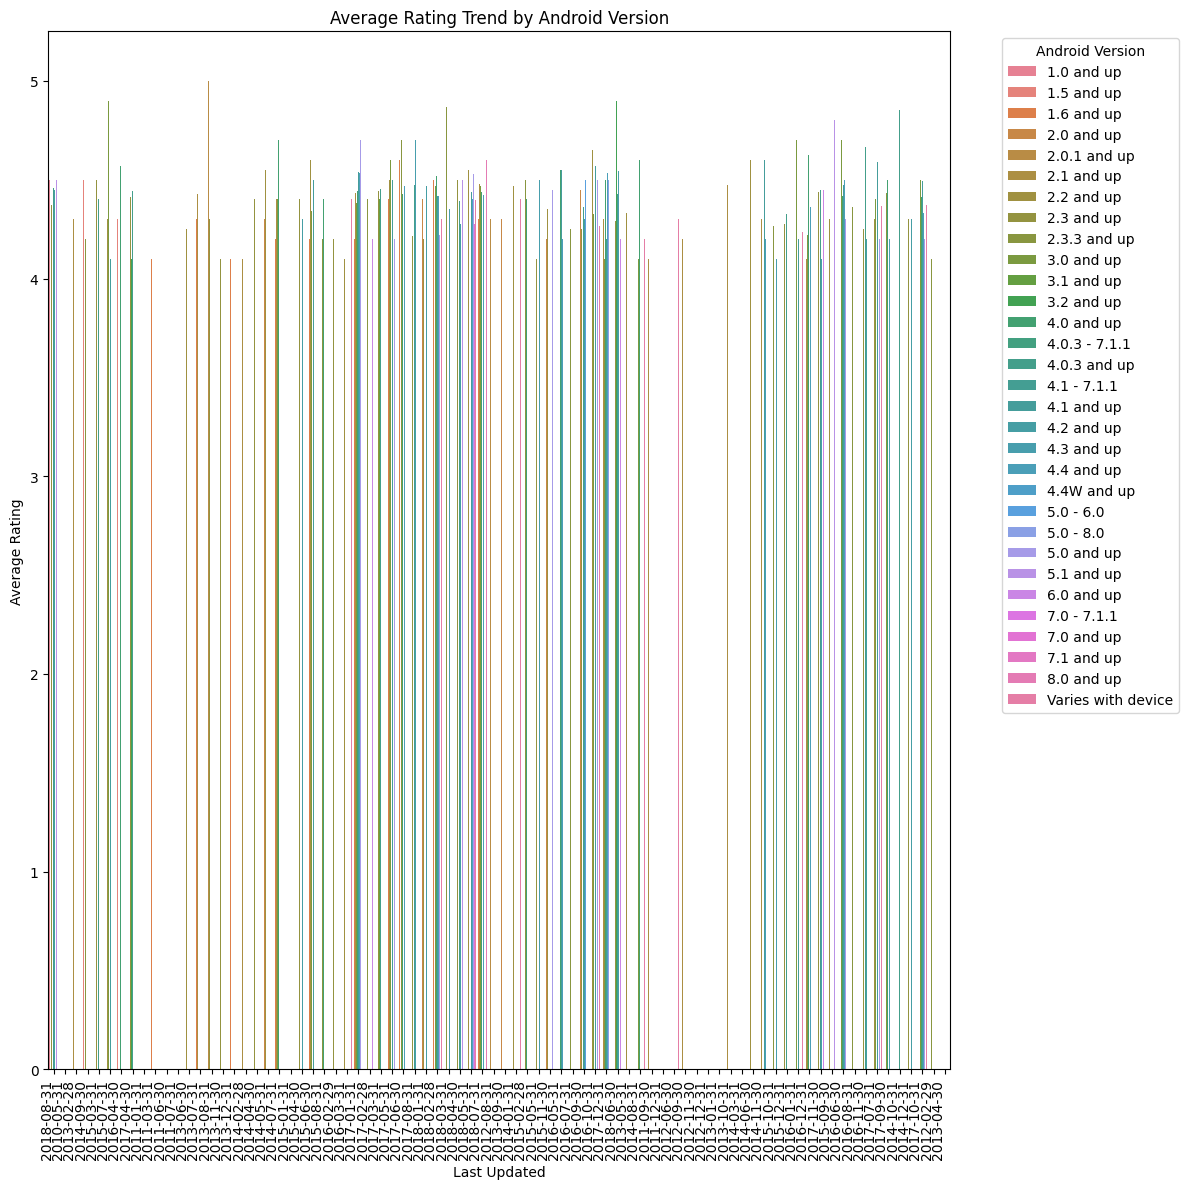

In [78]:

data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

threshold = 4.0
top_apps = data[data['Rating'] > threshold]
grouped_data = top_apps.groupby(['Android Ver', pd.Grouper(key='Last Updated', freq='M')]).agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index()

print(grouped_data)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'grouped_data' contains your grouped and aggregated data
plt.figure(figsize=(12, 12))
sns.barplot(x='Last Updated', y='Rating', hue='Android Ver', data=grouped_data)
plt.xlabel('Last Updated')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend by Android Version')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Android Version', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


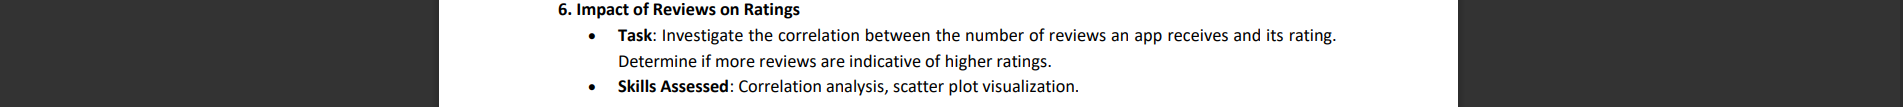

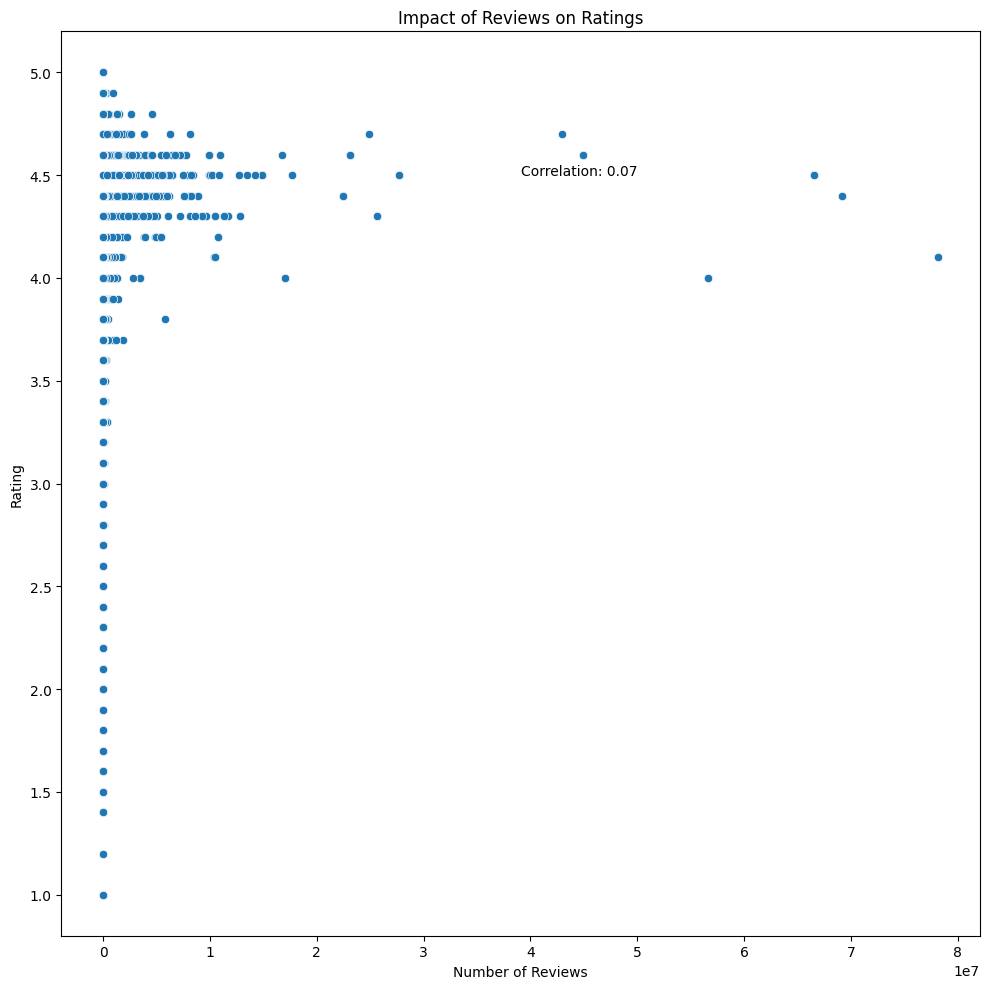

In [80]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
filtered_data = data.dropna(subset=['Reviews', 'Rating'])
filtered_data = filtered_data[(filtered_data['Reviews'] > 0) & (filtered_data['Rating'] > 0)]

# Calculate the correlation coefficient between 'Reviews' and 'Rating'
correlation = filtered_data['Reviews'].corr(filtered_data['Rating'])

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Reviews', y='Rating', data=filtered_data)
plt.title('Impact of Reviews on Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.annotate(f'Correlation: {correlation:.2f}', xy=(filtered_data['Reviews'].max() / 2, filtered_data['Rating'].max() - 0.5))
plt.tight_layout()
plt.show()